<a href="https://colab.research.google.com/github/dsmithnh3/blank-app/blob/main/yolov5_p%26ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5 --quiet  # clone
%cd yolov5
!pip install -r requirements.txt --quiet  # install

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.8 MB/s eta 0:00:00


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-e7d97eba-a794-1470-87de-b8c504fcdabe)


In [ ]:
# Fetch images, labels, train.txt, val.txt, dataset
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/train.txt --quiet
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/val.txt --quiet
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/dataset.yaml --quiet
#!wget https://github.com/ch-hristov/p-id-symbols/raw/main/best.pt --quiet
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/images.zip

--2023-01-26 19:28:53--  https://github.com/ch-hristov/p-id-symbols/raw/main/images.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ch-hristov/p-id-symbols/main/images.zip [following]
--2023-01-26 19:28:53--  https://media.githubusercontent.com/media/ch-hristov/p-id-symbols/main/images.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1502819066 (1.4G) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   1.40G   241MB/s    in 5.5s    

2023-01-26 19:29:30 (259 MB/s) - ‘images.zip’ saved [1502819066/1502819066]



In [ ]:
import os

!wget https://github.com/ch-hristov/p-id-symbols/raw/main/labels.zip
#!wget https://github.com/ch-hristov/p-id-symbols/raw/main/line_labels.zip

!unzip -qq  'labels.zip' -d './labels'

--2023-01-25 07:58:03--  https://github.com/ch-hristov/p-id-symbols/raw/main/labels.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ch-hristov/p-id-symbols/main/labels.zip [following]
--2023-01-25 07:58:04--  https://media.githubusercontent.com/media/ch-hristov/p-id-symbols/main/labels.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6653514 (6.3M) [application/zip]
Saving to: ‘labels.zip’

labels.zip          100%[===================>]   6.34M  --.-KB/s    in 0.03s   

2023-01-25 07:58:06 (184 MB/s) - ‘labels.zip’ saved [6653514/6653514]



In [ ]:
!unzip -qq 'images.zip' -d './images'

# Guarantee the labels are properly formatted and working

1
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x1280 at 0x7FC378714C40>


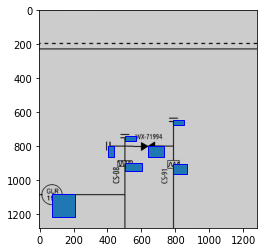

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from os import listdir
from os.path import isfile, join
images_path = "./images/"
onlyfiles = [f for f in listdir(images_path) if isfile(join(images_path, f))]

class Annotation:
  def __init__(self, _class, x, y, width, height):
    self._class = _class
    self.x = float(x)
    self.y = float(y)
    self.x1 = float(width)
    self.y1 = float(height)
    self.box = [self.x,self.y, self.x1, self.y1]

image_id = '0_0_1280'

annotation_files = [f for f in listdir('./labels') if isfile(join("./labels", f)) and f.startswith(image_id)]
print(len(annotation_files))
annotations = []

for file in annotation_files:
  with open(join("./labels", file)) as file_in:
    lines = []
    for line in file_in:
        _class, x, y, width, height = line.split(' ')
        lines.append(Annotation(_class, x, y, width, height))
    annotations = lines

image_name = str(image_id)+".jpg"
image = Image.open(images_path+image_name)
print(image)

fig, ax = plt.subplots()

# Draw boxes and add label to each box
for ann in annotations:
    box = ann.box
    s = image.size
    bb = patches.Rectangle((box[0] * s[0],box[1] * s[1]), box[2] * s[0],box[3] * s[1], edgecolor="blue")
    ax.add_patch(bb)

ax.imshow(image)
plt.show()

In [ ]:
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/train_line.txt
!wget https://github.com/ch-hristov/p-id-symbols/raw/main/val_line.txt

os.rename('train_line.txt','train.txt')
os.rename('val_line.txt','val.txt')

--2023-01-25 07:58:32--  https://github.com/ch-hristov/p-id-symbols/raw/main/train_line.txt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ch-hristov/p-id-symbols/main/train_line.txt [following]
--2023-01-25 07:58:33--  https://raw.githubusercontent.com/ch-hristov/p-id-symbols/main/train_line.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694146 (678K) [text/plain]
Saving to: ‘train_line.txt’

train_line.txt      100%[===================>] 677.88K  --.-KB/s    in 0.005s  

2023-01-25 07:58:34 (132 MB/s) - ‘train_line.txt’ saved [694146/694146]

--2023-01-25 07:58:34--  https://github.c

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 KB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="dataset.yaml", epochs=10, imgsz = 1280)  # train the model
results = model.val()  # evaluate model performance on the validation set
#results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
success = model.export(format="onnx")  # export the model to ONNX format

  0%|          | 0.00/6.23M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.19 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=dataset.yaml, epochs=10, patience=50, batch=16, imgsz=1280, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, wor

FileNotFoundError: ignored

In [ ]:
!python ./train.py --img 672 --batch 8 --epochs 35 --data dataset.yaml --weights yolov5l.pt --multi-scale

In [ ]:
!python "/content/yolov5/detect.py" --weights "/content/yolov5/best.pt" --use_segments --source "https://instrumentationtools.com/wp-content/uploads/2016/09/instrumentationtools.com_piping-and-instrumentation-diagram.jpg"